In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data from housing.csv file
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Total number of rows is 20640. All the columns other than total_bedrooms contain 20640 non-null values, it means there are some null values in that column.
#### As the number of null values is less comparatively, lets drop the rows with null values.

In [4]:
#Droppping the null values, keeping inplace true to make changes in original dataframe
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
#Importing train test split from sklearn
from sklearn.model_selection import train_test_split

In [7]:
#Creating x,y data for the model
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [11]:
train_data = X_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17802,-121.81,37.36,20.0,3189.0,420.0,1234.0,389.0,7.5813,<1H OCEAN,374100.0
10330,-117.76,33.83,15.0,3086.0,457.0,1262.0,436.0,6.4415,<1H OCEAN,300700.0
15904,-122.41,37.74,48.0,409.0,86.0,148.0,70.0,3.6687,NEAR BAY,335000.0
764,-122.10,37.66,37.0,901.0,191.0,599.0,206.0,3.7303,NEAR BAY,149700.0
15116,-117.00,32.85,24.0,1888.0,319.0,950.0,319.0,5.2820,<1H OCEAN,140800.0
...,...,...,...,...,...,...,...,...,...,...
3538,-118.51,34.26,29.0,2472.0,354.0,1109.0,397.0,5.5433,<1H OCEAN,332500.0
9000,-118.34,34.00,49.0,2465.0,372.0,1018.0,359.0,4.0000,<1H OCEAN,296800.0
1264,-121.70,37.98,9.0,3079.0,519.0,1562.0,512.0,5.1041,INLAND,172900.0
4753,-118.33,34.04,31.0,1090.0,251.0,955.0,239.0,2.9130,<1H OCEAN,192500.0


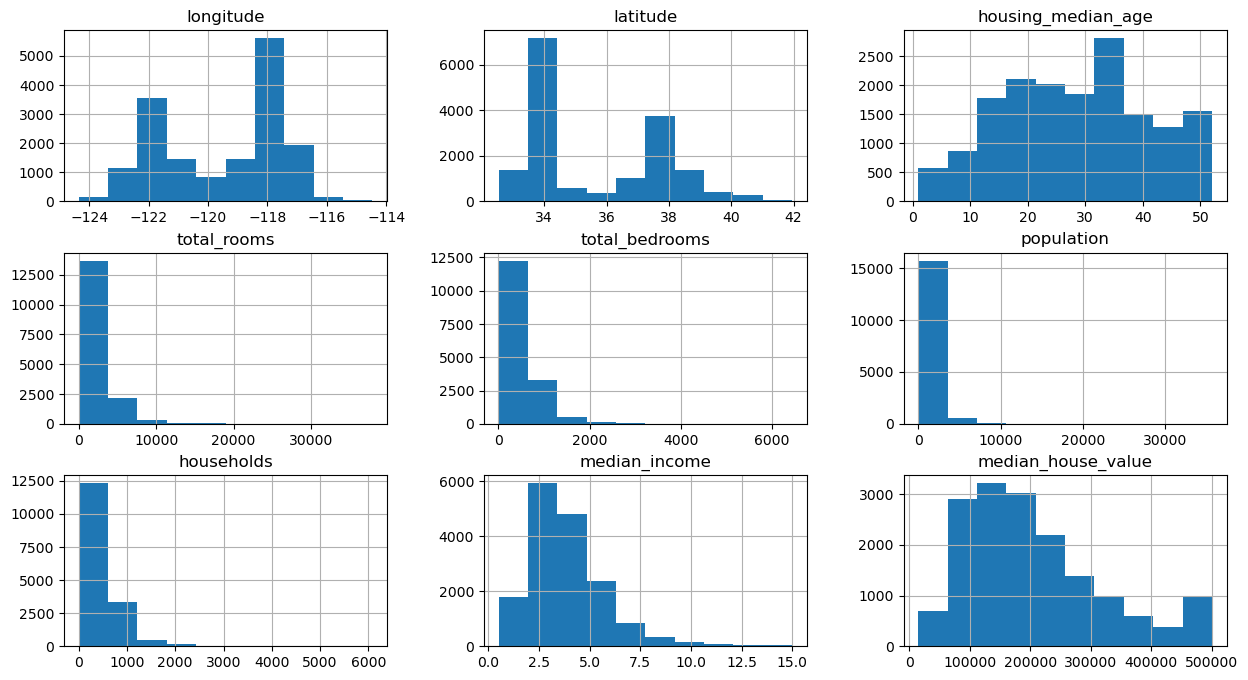

In [13]:
train_data.hist(figsize=(15,8))
plt.show()

In [14]:
train_data.drop(['ocean_proximity'], axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924561,-0.105427,0.046817,0.071521,0.103021,0.059596,-0.010142,-0.039147
latitude,-0.924561,1.000000,0.008990,-0.037545,-0.068446,-0.110027,-0.073826,-0.084760,-0.150050
housing_median_age,-0.105427,0.008990,1.000000,-0.359642,-0.319243,-0.295328,-0.303013,-0.122602,0.103464
total_rooms,0.046817,-0.037545,-0.359642,1.000000,0.929821,0.856662,0.918692,0.199153,0.136730
total_bedrooms,0.071521,-0.068446,-0.319243,0.929821,1.000000,0.878329,0.980150,-0.007216,0.053783
population,0.103021,-0.110027,-0.295328,0.856662,0.878329,1.000000,0.907375,0.004079,-0.024137
households,0.059596,-0.073826,-0.303013,0.918692,0.980150,0.907375,1.000000,0.013572,0.068302
median_income,-0.010142,-0.084760,-0.122602,0.199153,-0.007216,0.004079,0.013572,1.000000,0.688488
median_house_value,-0.039147,-0.150050,0.103464,0.136730,0.053783,-0.024137,0.068302,0.688488,1.000000


<Axes: >

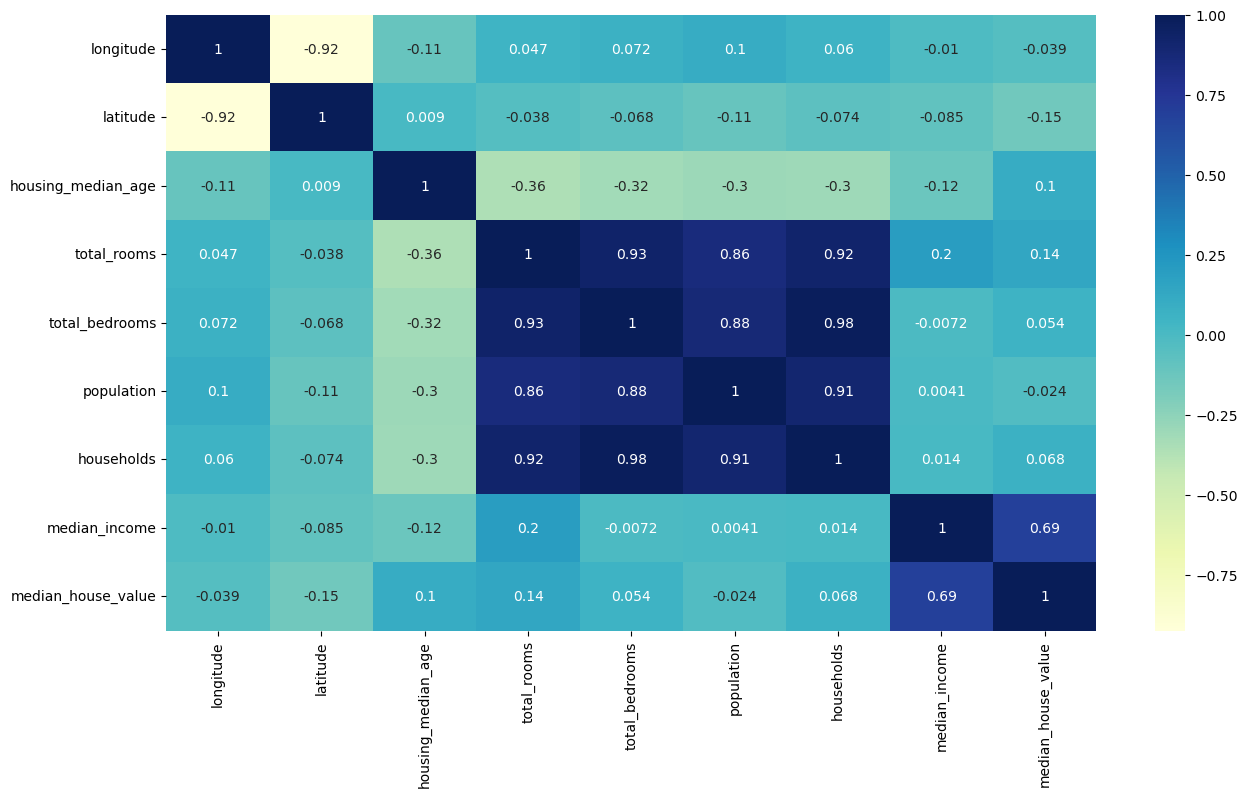

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop(['ocean_proximity'], axis=1).corr(), annot=True, cmap='YlGnBu')

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] * 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] * 1)
train_data['population'] = np.log(train_data['population'] * 1)
train_data['households'] = np.log(train_data['households'] * 1)

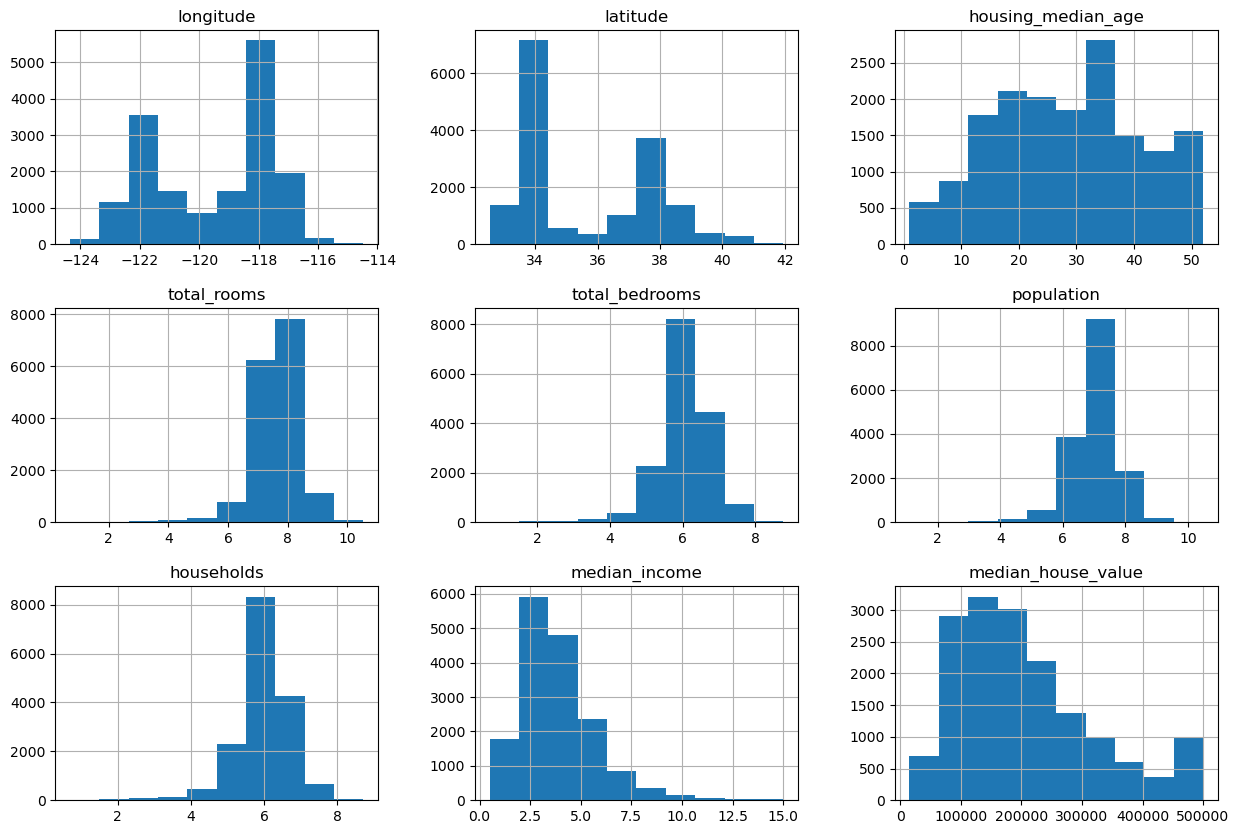

In [17]:

train_data.hist(figsize=(15,10))
plt.show()

#### Done with data exploring. Now, lets start data preprocessing.

In [18]:
#Using pandas one hot encoding
pd.get_dummies(train_data.ocean_proximity, dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17802,1,0,0,0,0
10330,1,0,0,0,0
15904,0,0,0,1,0
764,0,0,0,1,0
15116,1,0,0,0,0
...,...,...,...,...,...
3538,1,0,0,0,0
9000,1,0,0,0,0
1264,0,1,0,0,0
4753,1,0,0,0,0


In [19]:
#Joining the dummies with training data
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17802,-121.81,37.36,20.0,8.067463,6.040255,7.118016,5.963579,7.5813,374100.0,1,0,0,0,0
10330,-117.76,33.83,15.0,8.034631,6.124683,7.140453,6.077642,6.4415,300700.0,1,0,0,0,0
15904,-122.41,37.74,48.0,6.013715,4.454347,4.997212,4.248495,3.6687,335000.0,0,0,0,1,0
764,-122.10,37.66,37.0,6.803505,5.252273,6.395262,5.327876,3.7303,149700.0,0,0,0,1,0
15116,-117.00,32.85,24.0,7.543273,5.765191,6.856462,5.765191,5.2820,140800.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,-118.51,34.26,29.0,7.812783,5.869297,7.011214,5.983936,5.5433,332500.0,1,0,0,0,0
9000,-118.34,34.00,49.0,7.809947,5.918894,6.925595,5.883322,4.0000,296800.0,1,0,0,0,0
1264,-121.70,37.98,9.0,8.032360,6.251904,7.353722,6.238325,5.1041,172900.0,0,1,0,0,0
4753,-118.33,34.04,31.0,6.993933,5.525453,6.861711,5.476464,2.9130,192500.0,1,0,0,0,0


<Axes: >

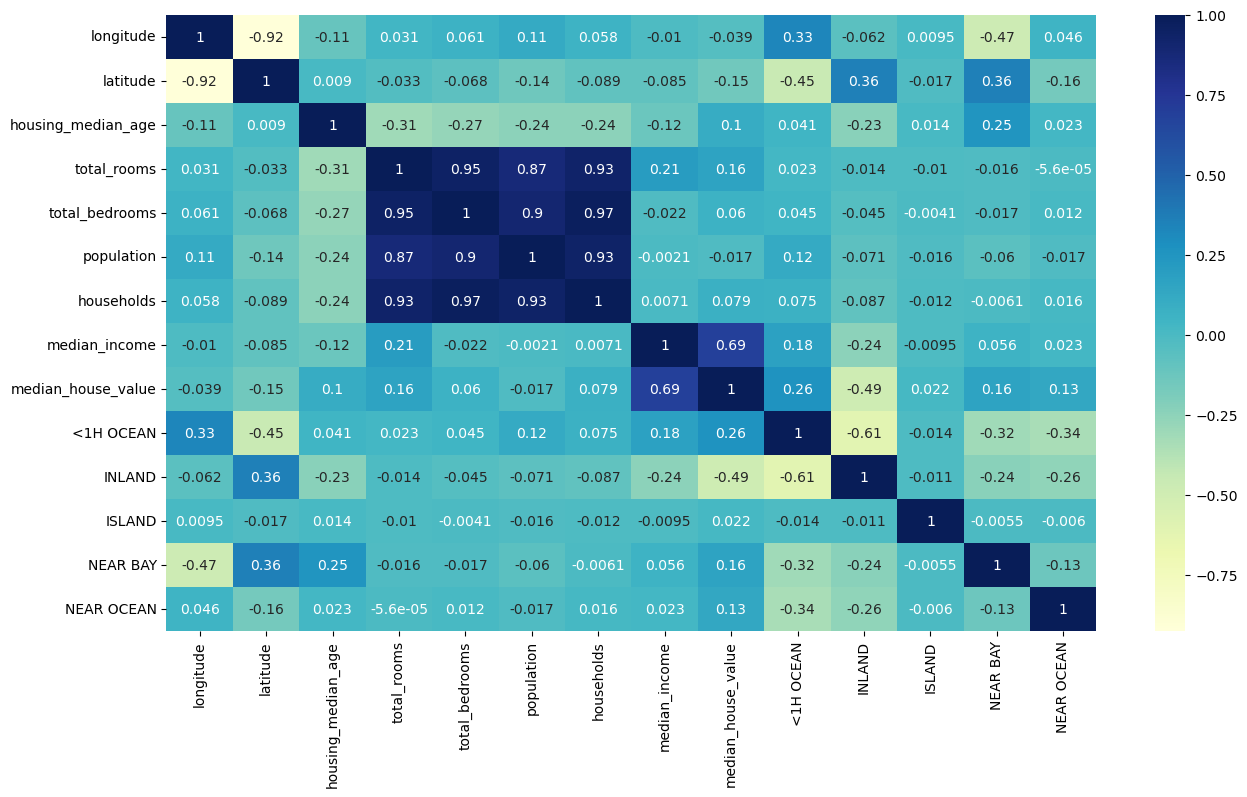

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

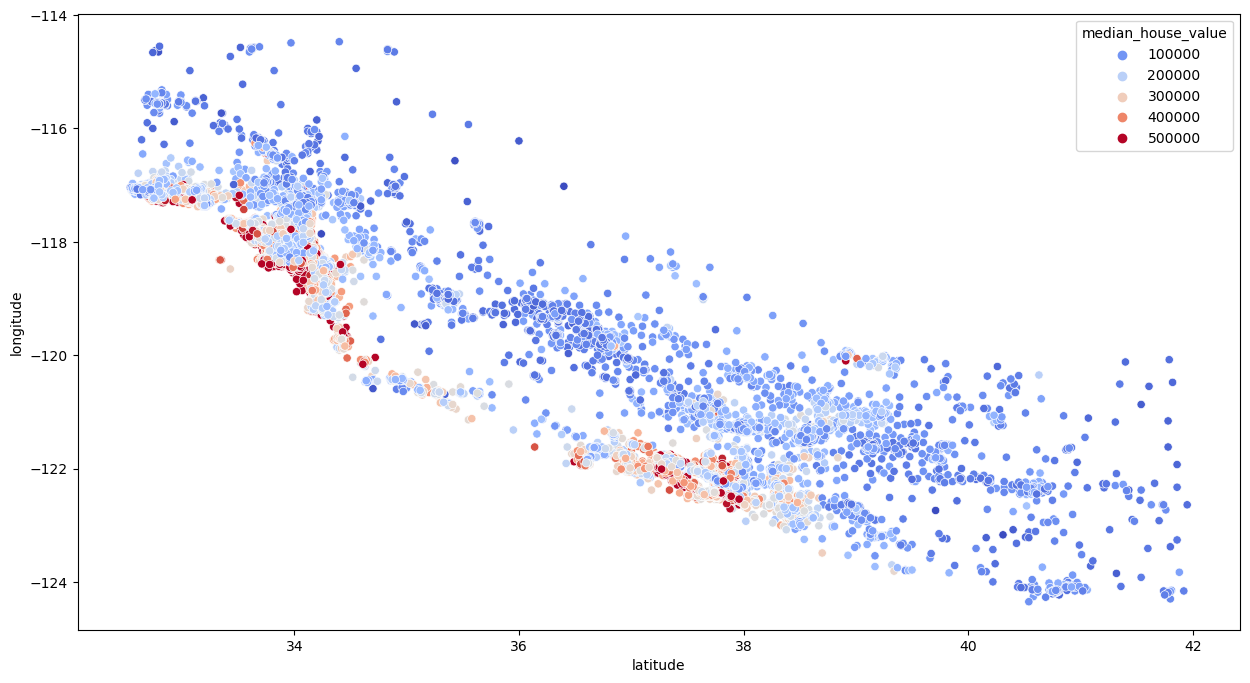

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

#### Here, we can see the houses near the coastline have higher median house value as compared to the ones in inland area.

#### Started with feature engineering

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17802,-121.81,37.36,20.0,8.067463,6.040255,7.118016,5.963579,7.5813,374100.0,1,0,0,0,0,0.748718,1.352789
10330,-117.76,33.83,15.0,8.034631,6.124683,7.140453,6.077642,6.4415,300700.0,1,0,0,0,0,0.762286,1.321998
15904,-122.41,37.74,48.0,6.013715,4.454347,4.997212,4.248495,3.6687,335000.0,0,0,0,1,0,0.740698,1.415493
764,-122.10,37.66,37.0,6.803505,5.252273,6.395262,5.327876,3.7303,149700.0,0,0,0,1,0,0.771995,1.276964
15116,-117.00,32.85,24.0,7.543273,5.765191,6.856462,5.765191,5.2820,140800.0,1,0,0,0,0,0.764282,1.308417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,-118.51,34.26,29.0,7.812783,5.869297,7.011214,5.983936,5.5433,332500.0,1,0,0,0,0,0.751243,1.305626
9000,-118.34,34.00,49.0,7.809947,5.918894,6.925595,5.883322,4.0000,296800.0,1,0,0,0,0,0.757866,1.327472
1264,-121.70,37.98,9.0,8.032360,6.251904,7.353722,6.238325,5.1041,172900.0,0,1,0,0,0,0.778340,1.287583
4753,-118.33,34.04,31.0,6.993933,5.525453,6.861711,5.476464,2.9130,192500.0,1,0,0,0,0,0.790035,1.277089


<Axes: >

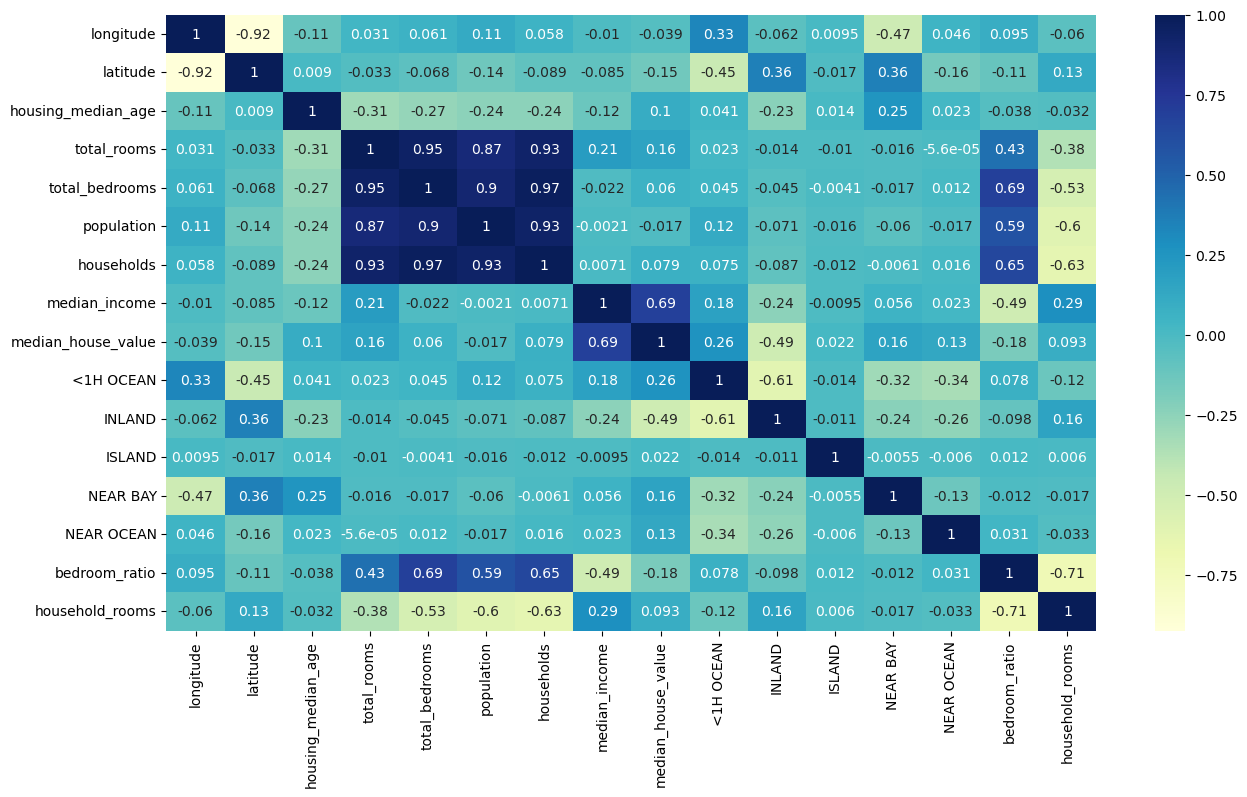

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

#### We are done with feature engineering. lets, train some models on the data. Firstly we will start with simple linear regression.

In [26]:
#Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [27]:
X_train, Y_train = train_data. drop (['median_house_value'], axis= 1), train_data['median_house_value']

#X_train_s= scaler.fit_transform(X_train)


reg= LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [28]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] * 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] * 1)
test_data['population'] = np.log(test_data['population'] * 1)
test_data['households'] = np.log(test_data['households'] * 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [30]:
test_data.shape

(4087, 16)

In [40]:
# np.isinf(test_data).any().any()

infinite_rows = test_data[np.isinf(test_data).any(axis=1)]
print(infinite_rows)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16171     -122.5     37.79                52.0     2.079442             0.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
16171    2.564949         0.0        15.0001            500001.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  bedroom_ratio  household_rooms  
16171       0       0         1           0            0.0              inf  


In [41]:
test_data= test_data[np.isfinite(test_data).all(1)]


In [45]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [46]:
reg.score(x_test, y_test)

0.6598584804863237